In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
from sklearn import cluster
from scipy.spatial import distance
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors.kde import KernelDensity
from sklearn import mixture
from sklearn.cluster import KMeans
from scipy import stats
from scipy.stats.kde import gaussian_kde
from sklearn.datasets import load_iris
from scipy.stats import multivariate_normal
%pylab inline
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.optimize as opt
import math
from sklearn import mixture
import math
import scipy.stats as stats

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['multivariate_normal']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
def generate_data(N):
    d1 = np.random.normal(0, 1, N)
    mean1 = [0, 0]
    cov1 = [[1, 0], [0, 1]] 
    d2 = multivariate_normal(mean1, cov1, N)
    return d1, d2

Zad 1.

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:32: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.


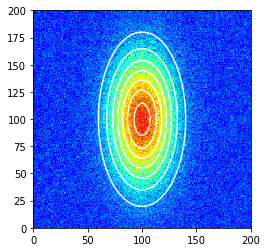

0.010441922305 1.00136153193


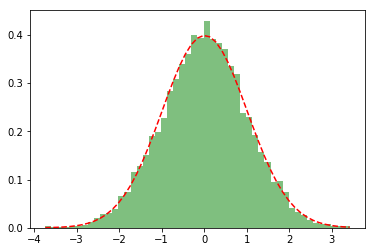

In [3]:
#https://stackoverflow.com/questions/21566379/fitting-a-2d-gaussian-function-using-scipy-optimize-curve-fit-valueerror-and-m

def twoD_Gaussian(xdata_tuple, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    (x, y) = xdata_tuple 
    xo = float(xo)
    yo = float(yo)    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) 
                            + c*((y-yo)**2)))
    return g.ravel()

# Create x and y indices
x = np.linspace(0, 200, 201)
y = np.linspace(0, 200, 201)
x, y = np.meshgrid(x, y)

#create data
data = twoD_Gaussian((x, y), 3, 100, 100, 20, 40, 0, 10)

# add some noise to the data and try to fit the data generated beforehand
initial_guess = (3,100,100,20,40,0,10)

data_noisy = data + 0.2*np.random.normal(size=data.shape)

popt, pcov = opt.curve_fit(twoD_Gaussian, (x, y), data_noisy, p0=initial_guess)

data_fitted = twoD_Gaussian((x, y), *popt)

fig, ax = plt.subplots(1, 1)
ax.hold(True)
ax.imshow(data_noisy.reshape(201, 201), cmap=plt.cm.jet, origin='bottom',
    extent=(x.min(), x.max(), y.min(), y.max()))
ax.contour(x, y, data_fitted.reshape(201, 201), 8, colors='w')
plt.show()


N = 10000
X = np.random.normal(0, 1, N)
mu = sum(X) / N
sigma = 0
for i in range(N):
    sigma += (X[i] - mu)**2
sigma = sigma / N

print(mu, sigma)
    
num_bins = 50

gauss = np.random.normal(mu, sigma, N)
n, bins, patches = plt.hist(X, num_bins, normed=1, facecolor='green', alpha=0.5)
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.show() 

Zad 2.

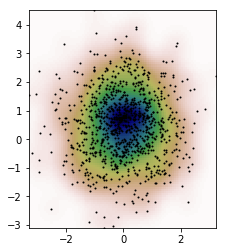

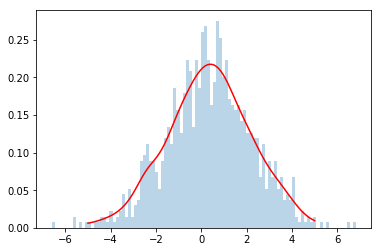

In [4]:
N = 1000
m1 = np.random.normal(0, 1, N)
m2 = np.random.normal(0.5, 1.2, N)
xmin, xmax, ymin, ymax = m1.min(), m1.max(), m2.min(), m2.max()
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)
fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax])
ax.plot(m1, m2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X)
d1 = np.random.normal(0.4, 1.9, 1000)
my_pdf = gaussian_kde(d1)
x = np.linspace(-5,5,100)
plt.plot(x,my_pdf(x),'r')
plt.hist(d1,normed=1,alpha=.3, bins = 100)
plt.show()

Zad 3.

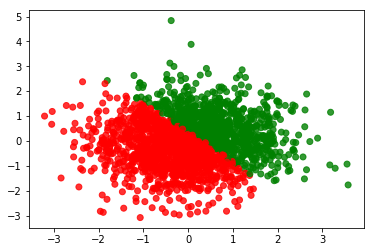

/usr/lib/python3.6/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is 

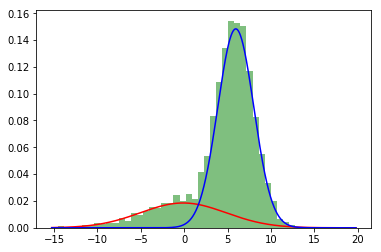

In [15]:
def GMM(samples, n):
    colormap = np.array(['red', 'green', 'blue', 'yellow', 'pink', 'orange', 'black', 'purple', 'gray', 'cyan'])
    gmix = mixture.GaussianMixture(n_components=n, covariance_type = 'spherical')
    gmix.fit(samples)
    #colors = ['r' if i==0 else 'g' for i in gmix.predict(samples)]
    ax = plt.gca()
    ax.scatter(samples[:,0], samples[:,1], c=colormap[gmix.predict(samples)], alpha=0.8)
    plt.show()

m1, m2 = generate_data(2000)
data = m2
GMM(data,2)


np.random.seed(1)
obs = np.concatenate((5*np.random.randn(1000, 1), \
                      6+2*np.random.randn(3000, 1)))



num_bins = 50
n, bins, patches = plt.hist(obs, num_bins, normed=1, facecolor='green', alpha=0.5)
plt.savefig("Data.png")


g = mixture.GMM(n_components=2)
g.fit(obs)

weights = g.weights_
means = g.means_
covars = g.covars_

D = obs.ravel()
xmin = D.min()
xmax = D.max()
x = np.linspace(xmin,xmax,1000)

mean = means[0]
sigma = math.sqrt(covars[0])
plt.plot(x,weights[0]*stats.norm.pdf(x,mean,sigma), c='red')

mean = means[1]
sigma = math.sqrt(covars[1])
plt.plot(x,weights[1]*stats.norm.pdf(x,mean,sigma), c='blue')

plt.savefig("DataGMM.png")
plt.show()

Zad 4.

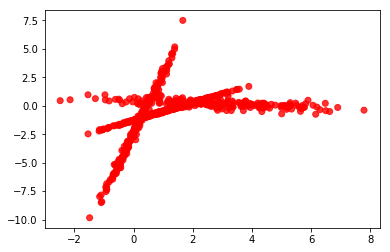

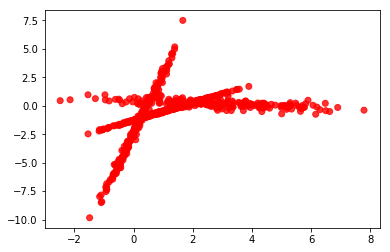

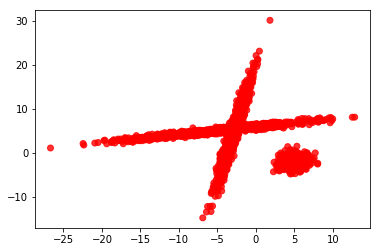

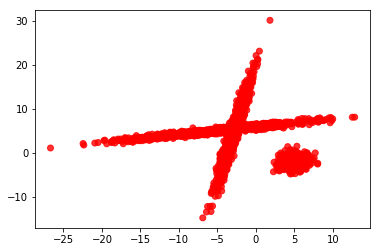

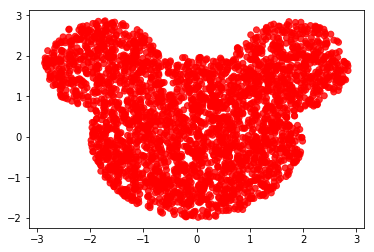

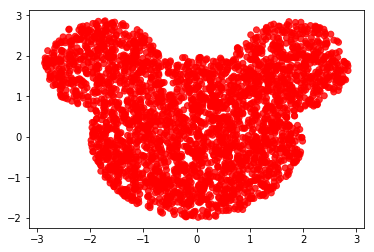

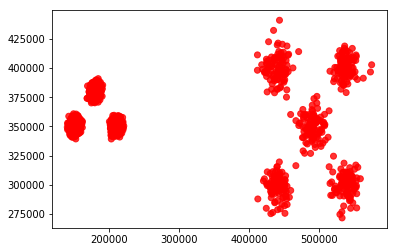

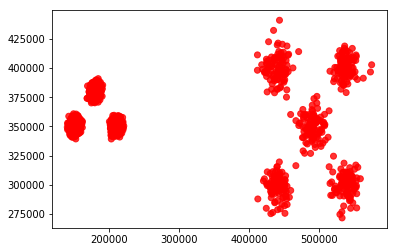

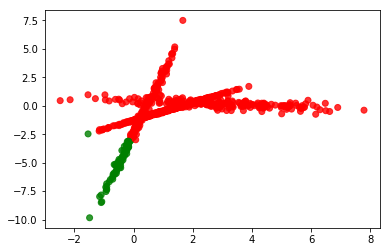

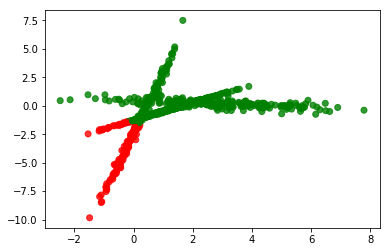

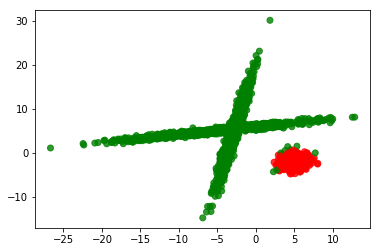

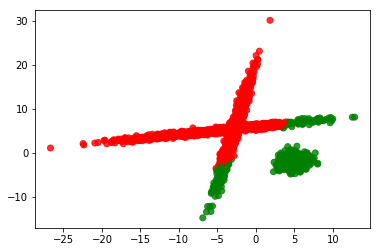

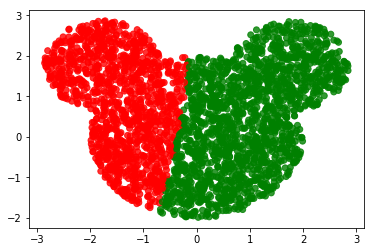

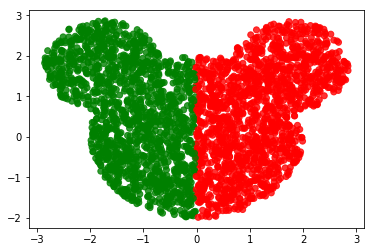

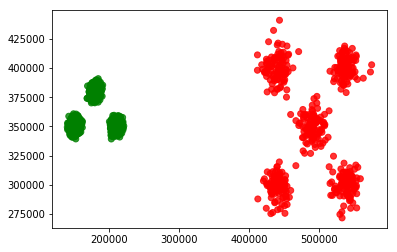

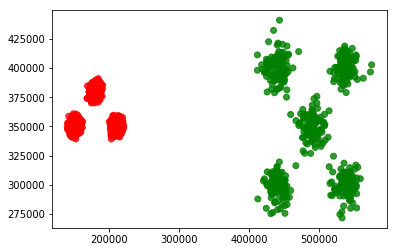

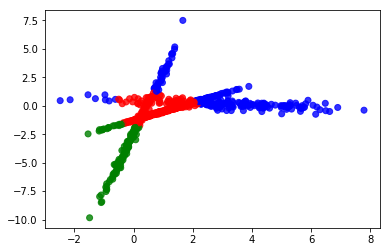

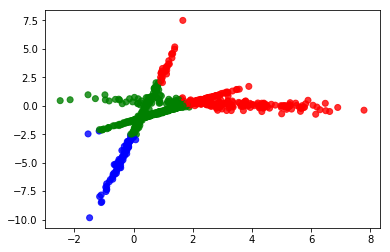

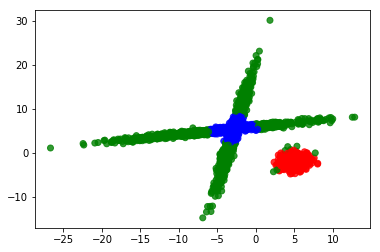

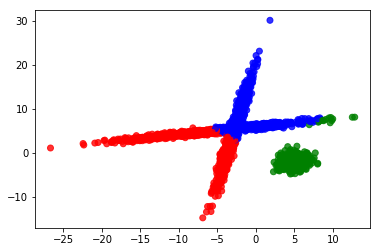

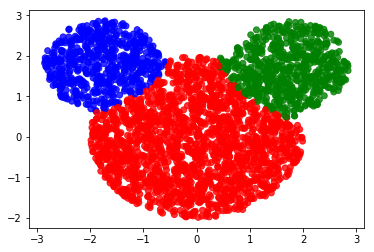

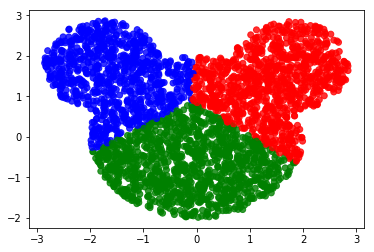

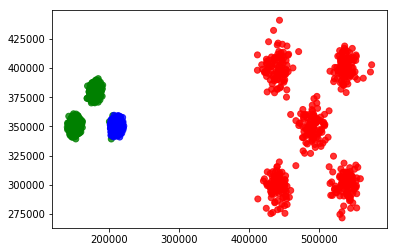

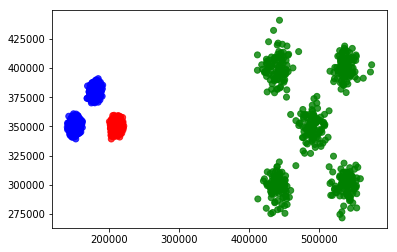

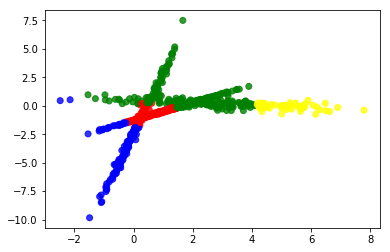

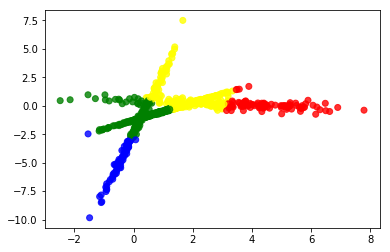

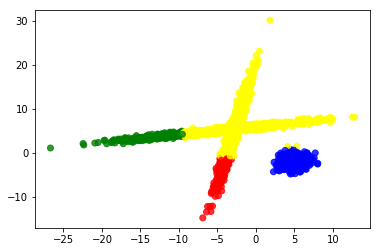

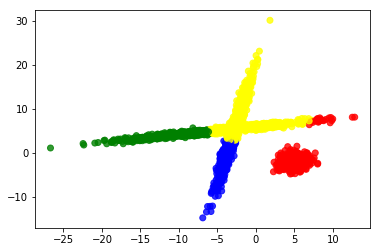

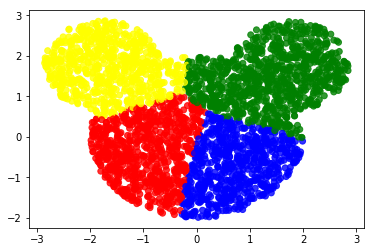

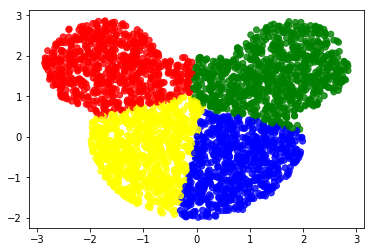

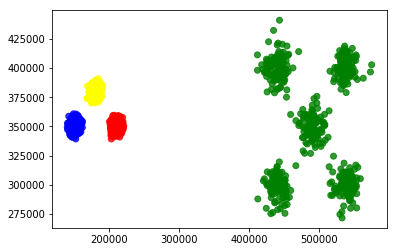

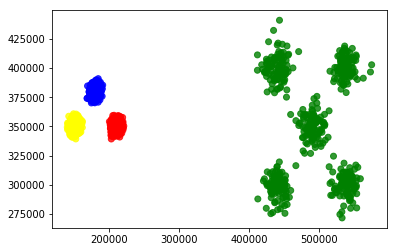

In [7]:
data1 = np.loadtxt("data11(1).txt", delimiter = ' ')
data2 = np.loadtxt("data11(2).txt", delimiter = ' ')
data3 = np.loadtxt("data11(3).txt", delimiter = ' ')
data4 = np.loadtxt("data11(4).txt", delimiter = ' ')

def kmeans(samples, n):
    colormap = np.array(['red', 'green', 'blue', 'yellow', 'pink'])
    model = KMeans(n_clusters=n)
    model.fit(samples)
    #colors = ['r' if i==0 else 'g' for i in model.predict(samples)]
    ax = plt.gca()
    ax.scatter(samples[:,0], samples[:,1], c=colormap[model.predict(samples)], alpha=0.8)
    plt.show()

for k in range(1,5):
    GMM(data1,k)
    kmeans(data1,k)
    GMM(data2,k)
    kmeans(data2,k)
    GMM(data3,k)
    kmeans(data3,k)
    GMM(data4,k)
    kmeans(data4,k)


Zad 5.

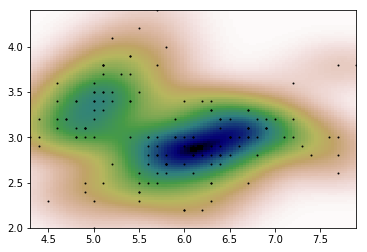

In [8]:
iris = load_iris()
data5, y_iris = iris.data, iris.target

m1 = data5[:,0]
m2 = data5[:,1]
xmin, xmax, ymin, ymax = m1.min(), m1.max(), m2.min(), m2.max()
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)
fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax])
ax.plot(m1, m2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

Gaussian KDE


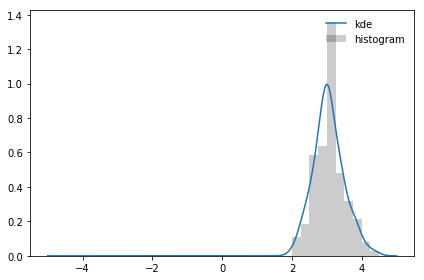

In [9]:
#Define parameters
xmax = 5
bins=40
num_samples = 100

#Generate equal-weighted samples
samples = data5[:,1]
weights = np.ones(num_samples) / num_samples

#Plot a histogram
plt.hist(samples, bins, (-xmax, xmax), histtype='stepfilled', 
         alpha=.2, normed=True, color='k', label='histogram')

#Construct a KDE and plot it
##HERE GAUSS
pdf = gaussian_kde(samples)
x = np.linspace(-xmax, xmax, 200)
y = pdf(x)
print("Gaussian KDE")
plt.plot(x, y, label='kde')

#Boiler plate
plt.legend(loc='best', frameon=False)
plt.tight_layout()

plt.show()

GMM


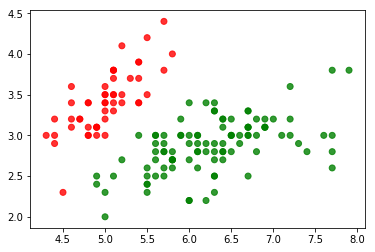

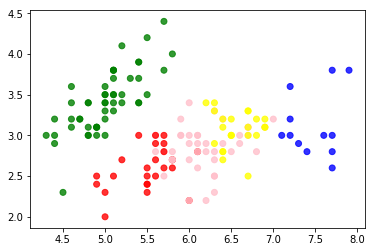

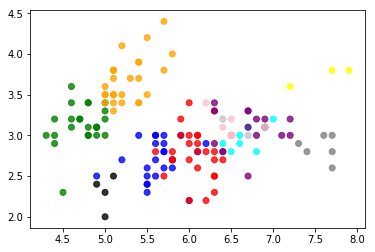

In [10]:
print("GMM")
K = [2, 5, 10]
for k in K:
    GMM(data5,k)